## 폴더 구성
내드라이브 > CAPSTONE > data  
  - **original**  

  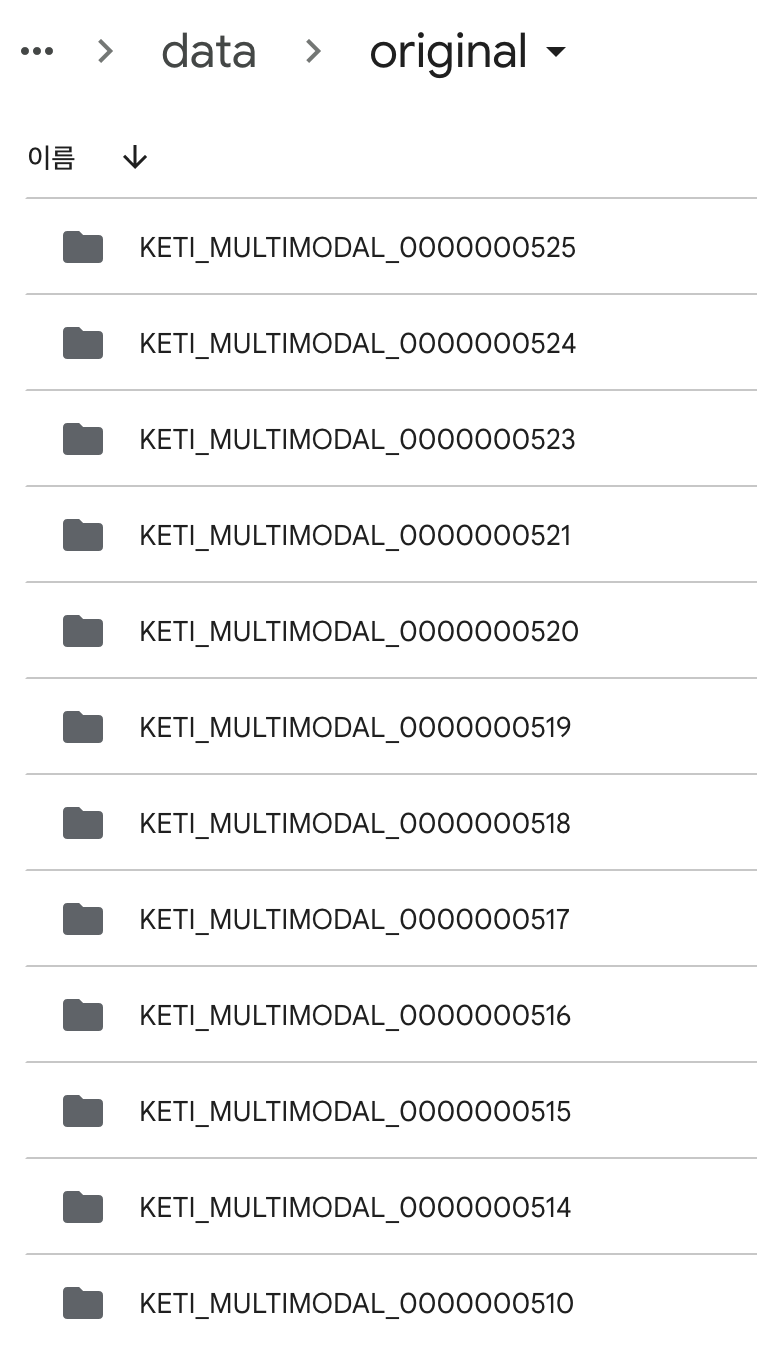  

   - **KETI_MULTIMODAL_** 폴더들
   - **train** : KETI_MULTIMODAL_ 폴더들에서 MP4 파일만 추출해서 저장한 폴더  

  - **cut**
   - **wav** : train 폴더의 MP4 파일을 반으로 나눠 wav 파일들로 저장한 폴더 
   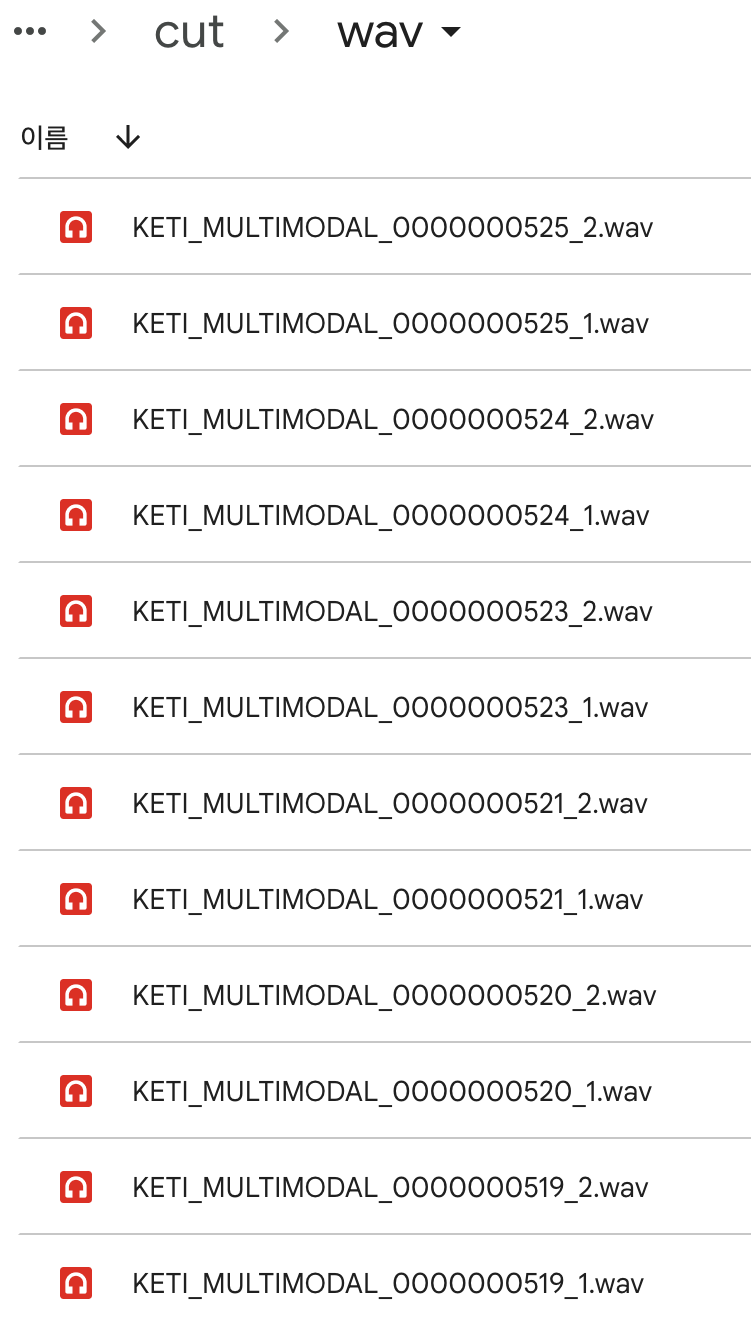  
   - **mel_image** : wav 폴더에 있는 파일에 mel-spectrogram 적용한 결과 이미지 파일 저장한 폴더

# MP4 파일 추출하기
 ! 구글 드라이브 마운트

In [16]:
import os

base_path = "/content/drive/MyDrive/CAPSTONE/data/original"
file_list = os.listdir(base_path)
# print("list: {}".format(file_list))
# print()

folders_including_mp4 = [file for file in file_list if file.startswith("KETI_MULTIMODAL_")]
# print("folders_including_mp4: {}".format(folders_including_mp4))
# print()

mp4_files = []
for i in range(len(folders_including_mp4)):
  mp4_files.append(base_path + '/' + folders_including_mp4[i] + "/" + folders_including_mp4[i] + ".mp4")
print(mp4_files) # data/original/ 내 mp4 파일 확인

['/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000514/KETI_MULTIMODAL_0000000514.mp4', '/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000515/KETI_MULTIMODAL_0000000515.mp4', '/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000510/KETI_MULTIMODAL_0000000510.mp4', '/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000516/KETI_MULTIMODAL_0000000516.mp4', '/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000517/KETI_MULTIMODAL_0000000517.mp4', '/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000518/KETI_MULTIMODAL_0000000518.mp4', '/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000519/KETI_MULTIMODAL_0000000519.mp4', '/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000520/KETI_MULTIMODAL_0000000520.mp4', '/content/drive/MyDrive/CAPSTONE/data/original/KETI_MULTIMODAL_0000000521/KETI_MULTIMODAL_0000000521.mp4', '/content/drive/MyDrive/CAPSTONE/dat

# MP4 파일을 train 폴더로 이동하기


```
shutil.move('이동시킬 파일 경로', '파일을 이동시킬 폴더의 경로')

```

In [ ]:
import shutil

to_path = "/content/drive/MyDrive/CAPSTONE/data/original/train"

for mp4_file in mp4_files:
  shutil.move(mp4_file, to_path)



---



# 음성데이터 자르기

In [18]:
from scipy.io import wavfile
from sklearn.utils import resample
import numpy as np
import librosa
import sklearn

import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display
import soundfile as sf
import IPython.display
import soundfile as sf

In [19]:
def play_audio(audio_file): # audio_file : 파일 경로
  t, tt = librosa.load(audio_file, sr = 16000)
  IPython.display.Audio(data = t, rate = tt)

In [23]:
def get_mp4(mp4_file): # mp4_file : 파일 경로
  (file_dir, file_id) = os.path.split(mp4_file)
  print(f"file dir : {file_dir}\t file id : {file_id}")
  
  # plot original mp4
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
  time = np.linspace(0, len(y)/sr, len(y)) # time axis (secs)
  fig, ax1 = plt.subplots() # plot
  ax1.plot(time, y, color = 'b', label='speech waveform')
  ax1.set_ylabel("Amplitude") # y 축
  ax1.set_xlabel("Time [s]") # x 축
  plt.title(f"original : {file_id}") # 제목(파일명)
  # plt.savefig(file_id+'.png')
  plt.show()
  
  """
  # display mp4
  play_audio(mp4_file)
  """

In [24]:
def save_half_as_wav(mp4_file): 
  """
  mp4_file : 파일 경로
  """
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
  (file_dir, file_id) = os.path.split(mp4_file)

  # cut half and save
  half = len(y) / 2
  y1 = y[:round(half)]
  y2 = y[round(half):]

  
  time1 = np.linspace(0, half, len(y1))
  time2 = np.linspace(0, half, len(y2))

  fig1, ax1 = plt.subplots()
  ax1.plot(time1, y1, color = 'r', label='speech waveform')
  ax1.set_ylabel("Amplitude") # y 축
  ax1.set_xlabel("Time [s]") # x 축
  plt.title(f"{file_id} half (1st)")
  # plt.savefig('cut_half '+file_id+'.png')
  plt.show()

  print()
  fig2, ax2 = plt.subplots()
  ax2.plot(time2, y2, color = 'r', label='speech waveform')
  ax2.set_ylabel("Amplitude") # y 축
  ax2.set_xlabel("Time [s]") # x 축
  plt.title(f"{file_id} half (2nd)")
  # plt.savefig('cut_half '+file_id+'.png')
  plt.show()
  

  # trg_audio_path
  file_name = file_id[:-4]
  file1_name = "/content/drive/MyDrive/CAPSTONE/data/cut/wav/" + file_name + "_1.wav"
  file2_name = "/content/drive/MyDrive/CAPSTONE/data/cut/wav/" + file_name + "_2.wav"
  sf.write(file1_name, y1, sr)
  sf.write(file2_name, y2, sr)
  print(f"split to {file_name}1\t {file_name}2")
  print("==============================================================================")

  return file1_name, file2_name

In [25]:
base_path = "/content/drive/MyDrive/CAPSTONE/data/original/train/"
file_list = os.listdir(base_path)

mp4_files = []
for f in file_list:
  mp4_files.append(base_path + f) 

file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000514.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


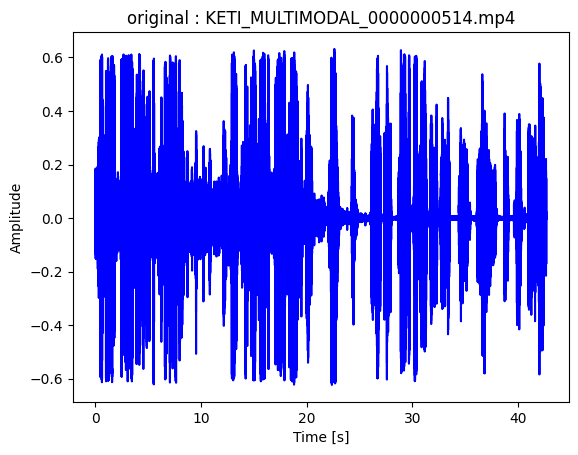

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


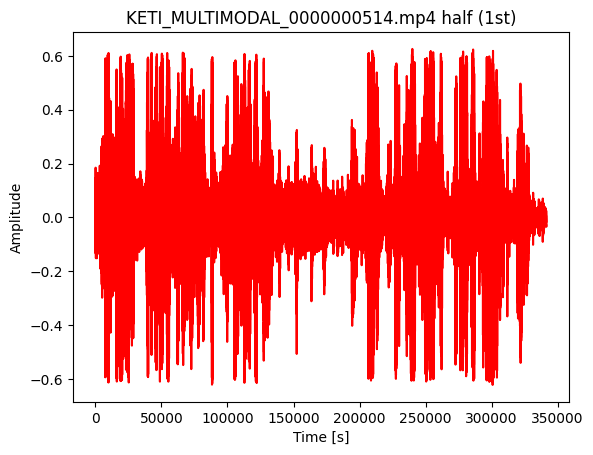

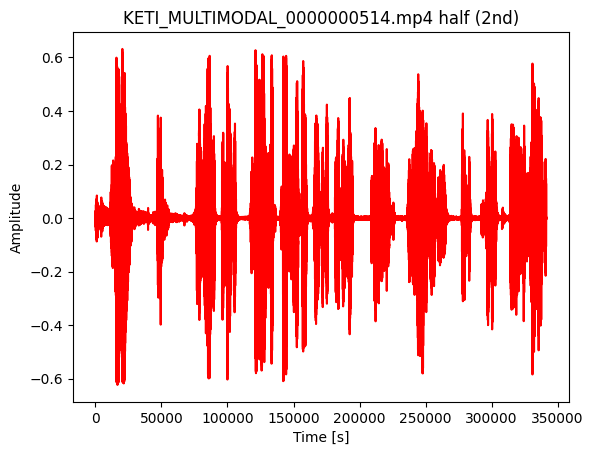

split to KETI_MULTIMODAL_00000005141	 KETI_MULTIMODAL_00000005142
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000510.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


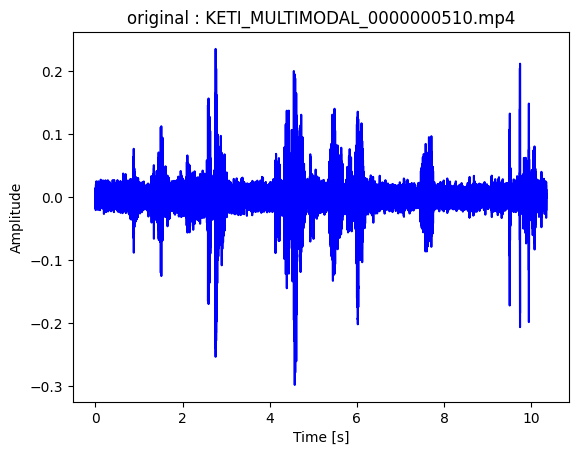

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


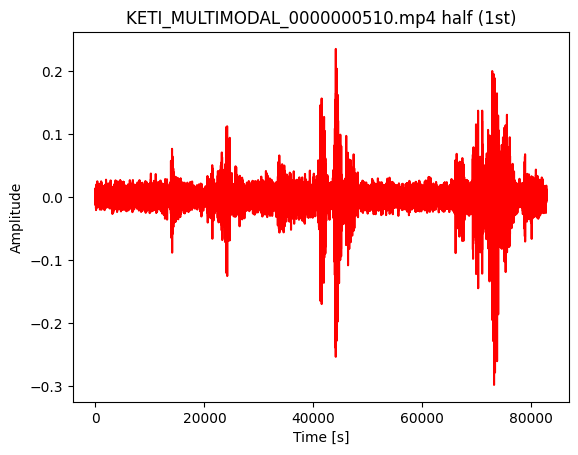

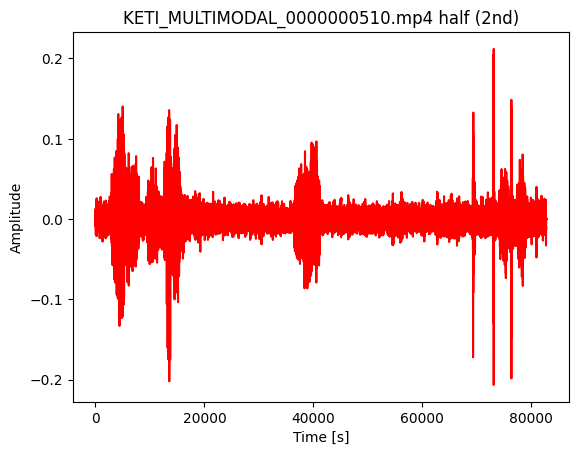

split to KETI_MULTIMODAL_00000005101	 KETI_MULTIMODAL_00000005102
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000515.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


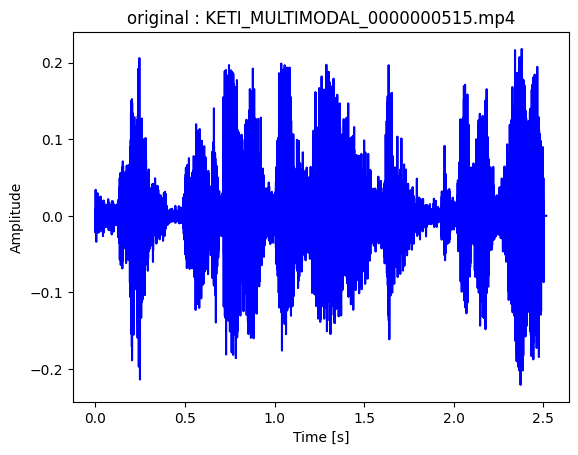

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


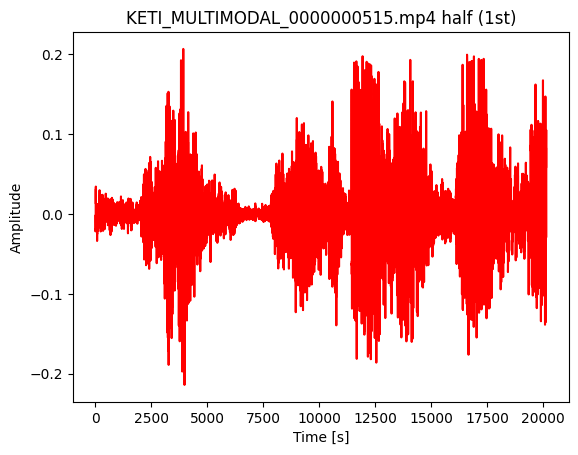

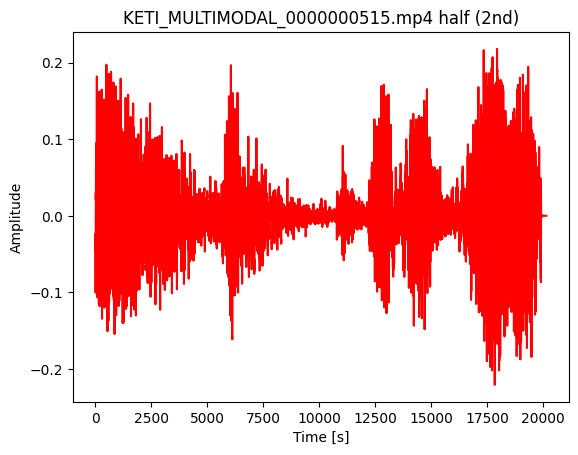

split to KETI_MULTIMODAL_00000005151	 KETI_MULTIMODAL_00000005152
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000516.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


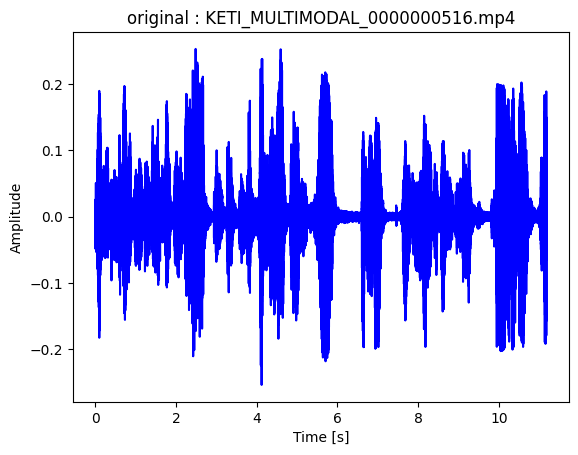

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


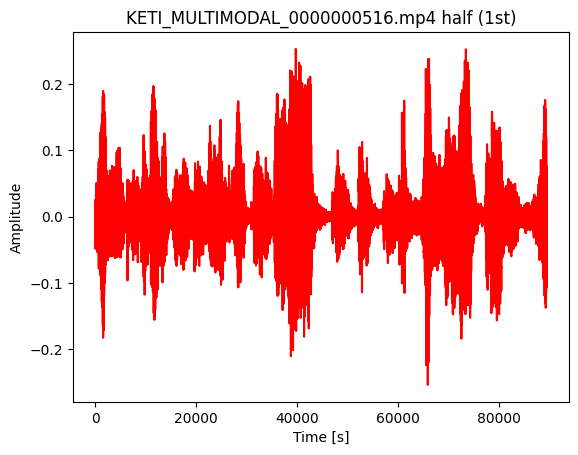

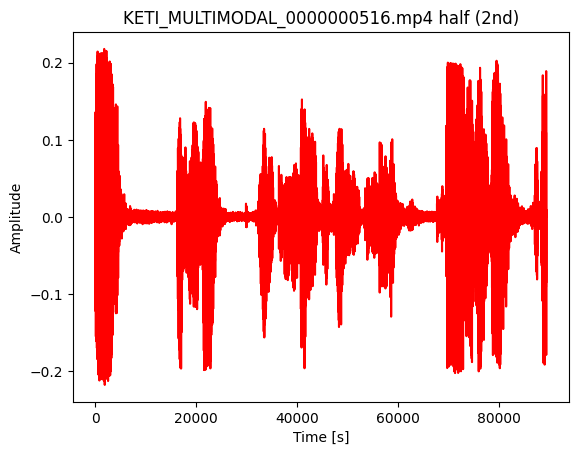

split to KETI_MULTIMODAL_00000005161	 KETI_MULTIMODAL_00000005162
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000518.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


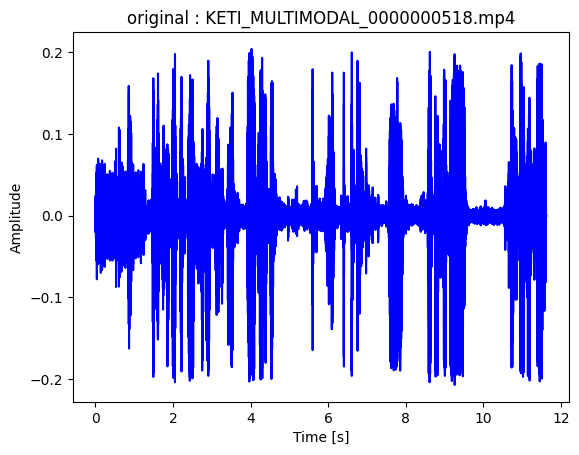

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


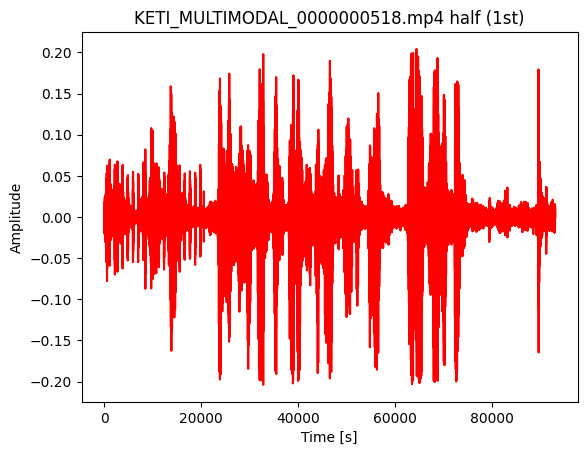

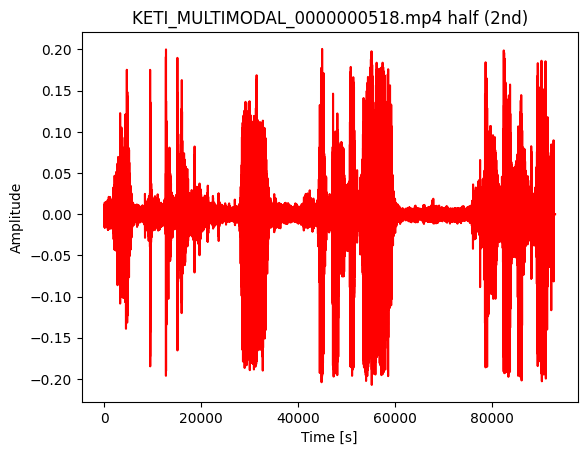

split to KETI_MULTIMODAL_00000005181	 KETI_MULTIMODAL_00000005182
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000517.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


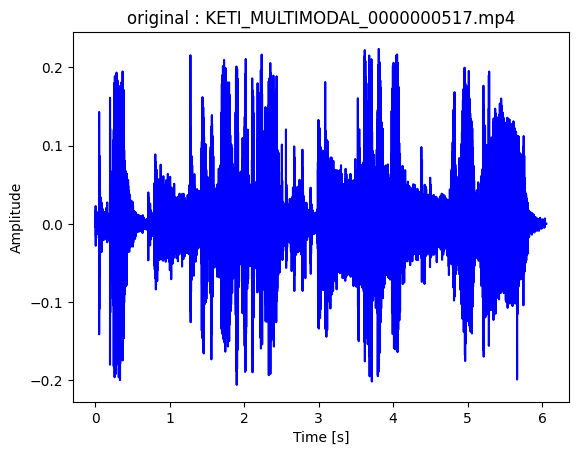

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


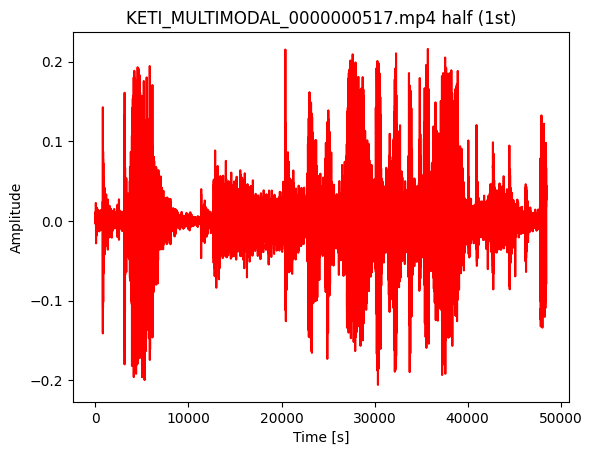

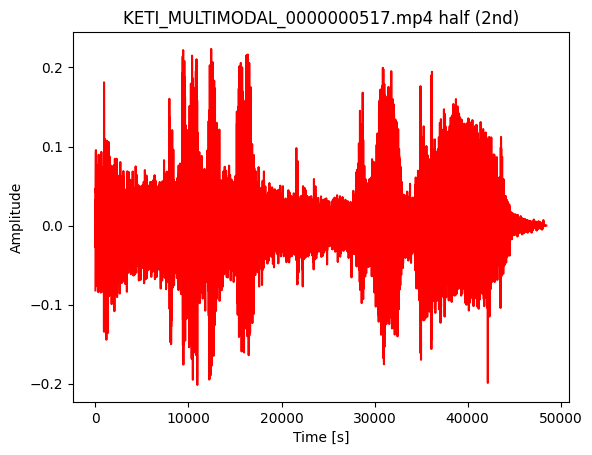

split to KETI_MULTIMODAL_00000005171	 KETI_MULTIMODAL_00000005172
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000519.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


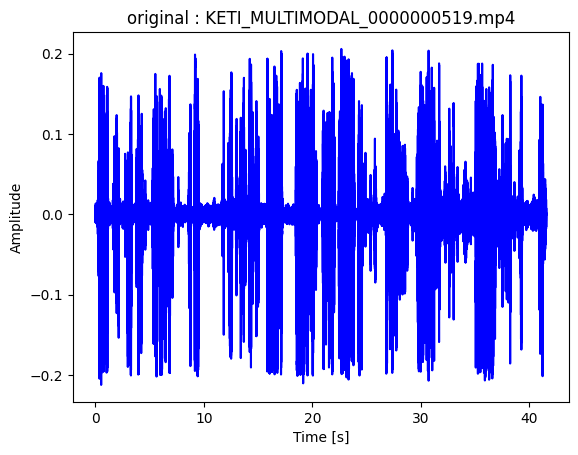

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


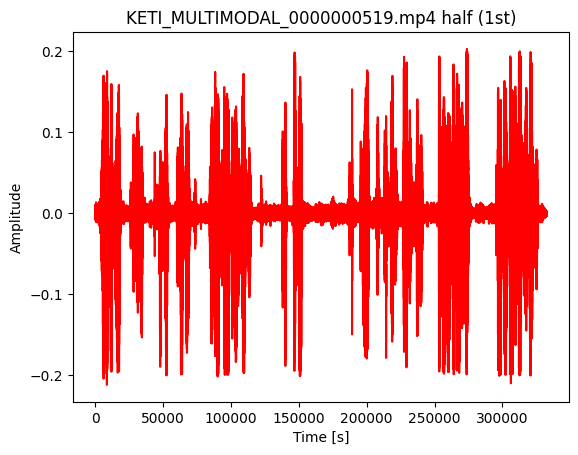

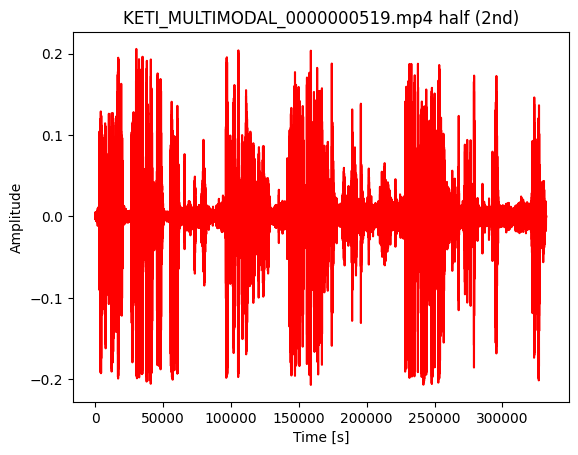

split to KETI_MULTIMODAL_00000005191	 KETI_MULTIMODAL_00000005192
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000520.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


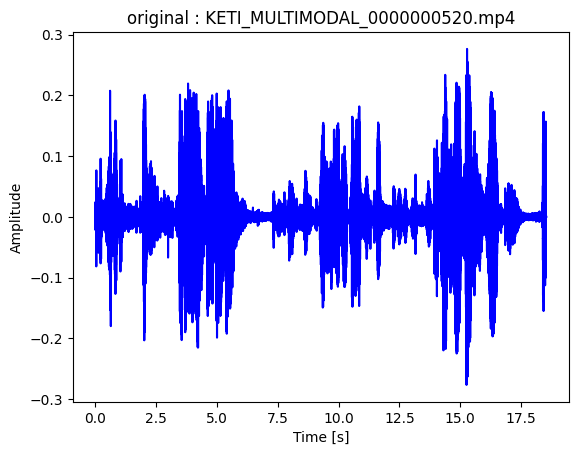

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


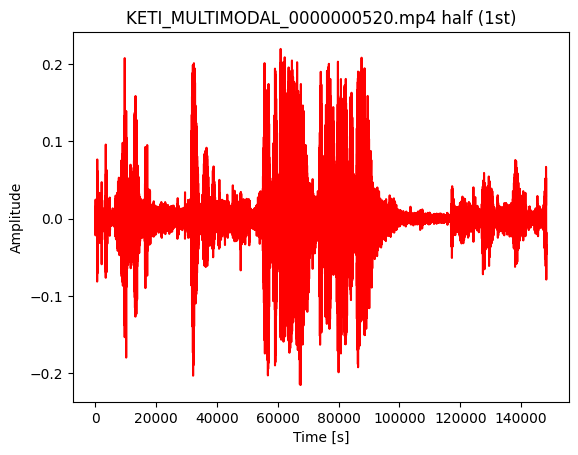

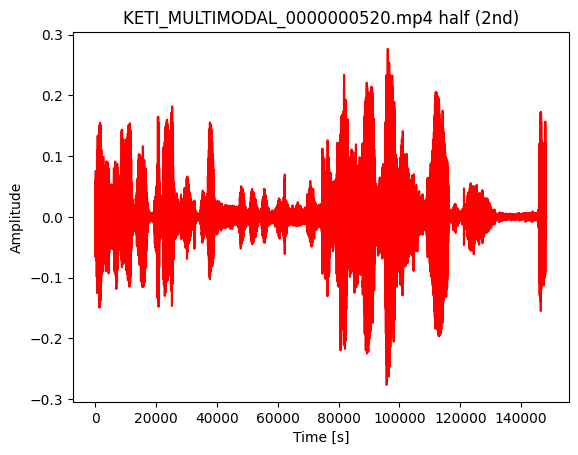

split to KETI_MULTIMODAL_00000005201	 KETI_MULTIMODAL_00000005202
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000521.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


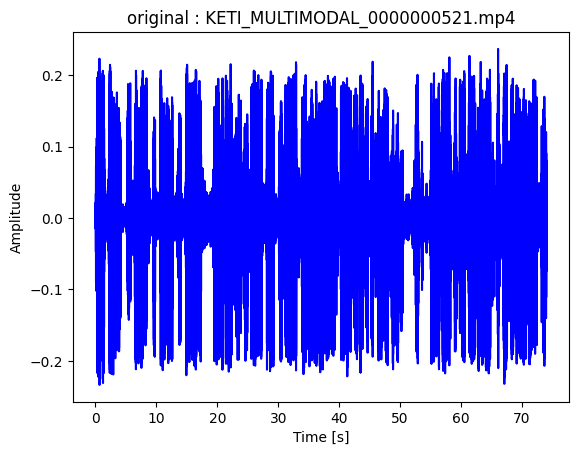

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


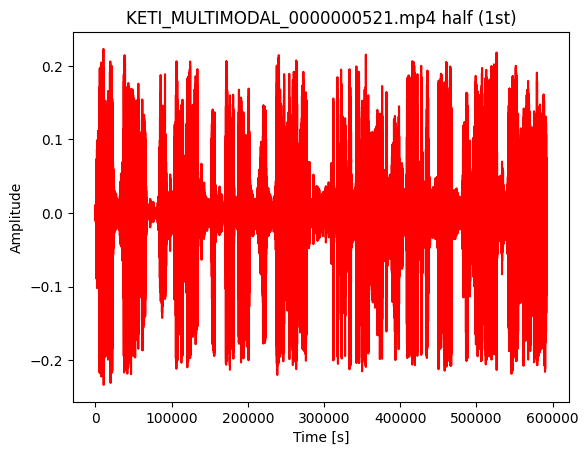

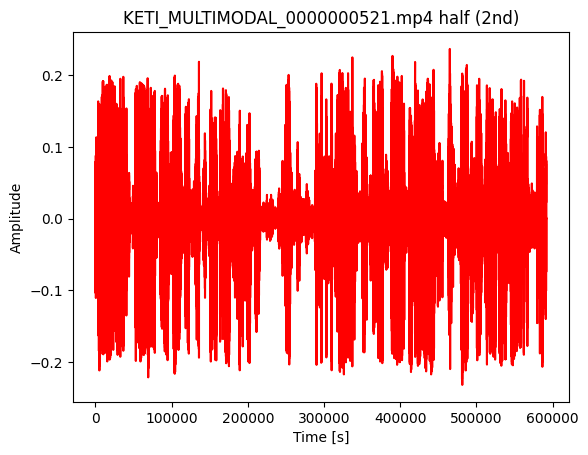

split to KETI_MULTIMODAL_00000005211	 KETI_MULTIMODAL_00000005212
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000523.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


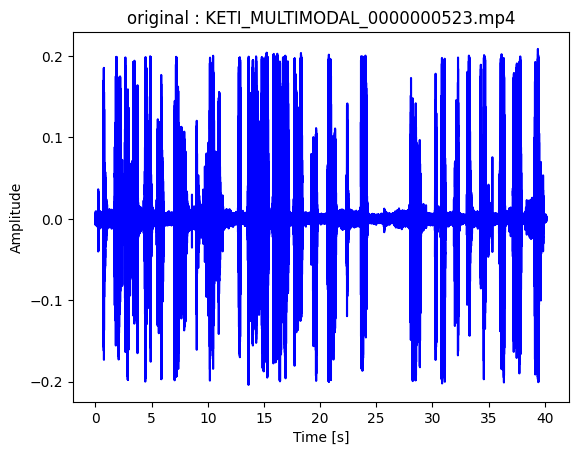

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


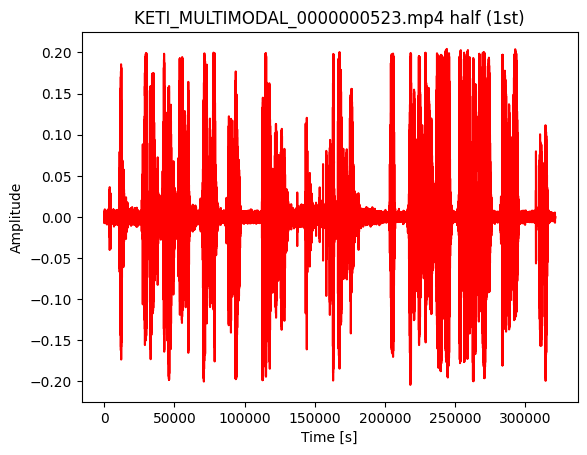

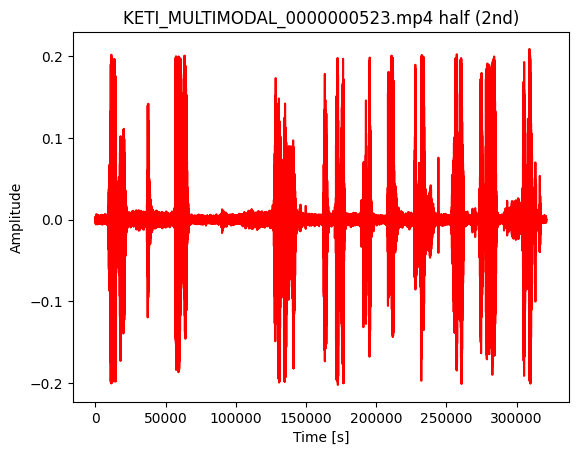

split to KETI_MULTIMODAL_00000005231	 KETI_MULTIMODAL_00000005232
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000524.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


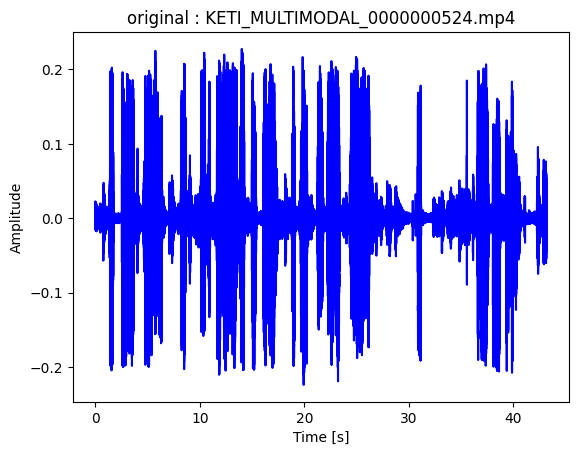

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


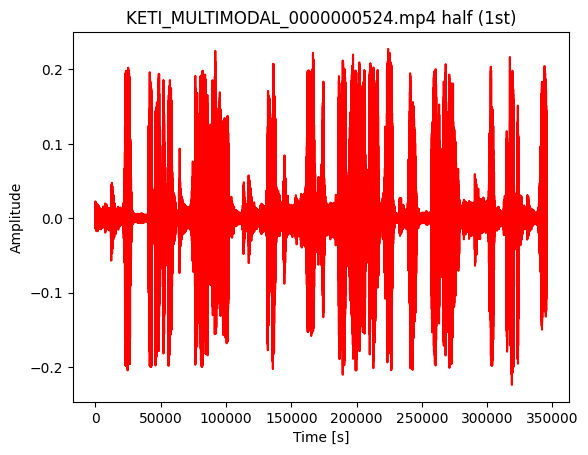

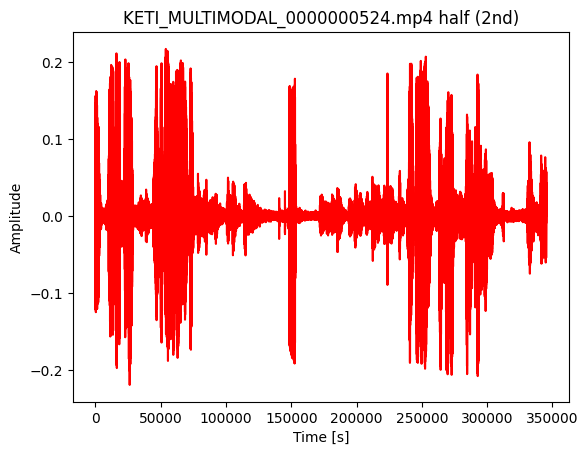

split to KETI_MULTIMODAL_00000005241	 KETI_MULTIMODAL_00000005242
file dir : /content/drive/MyDrive/CAPSTONE/data/original/train	 file id : KETI_MULTIMODAL_0000000525.mp4


<ipython-input-23-c69a27403c2e>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # sr(sampling rate) = 16000 ; 1초당 16000개의 데이터 샘플링
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


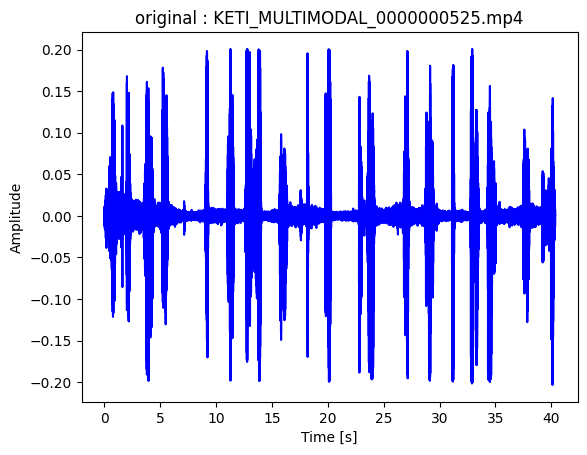

<ipython-input-24-d1123c1ed09a>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(mp4_file, sr = 16000) # get mp4 file
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


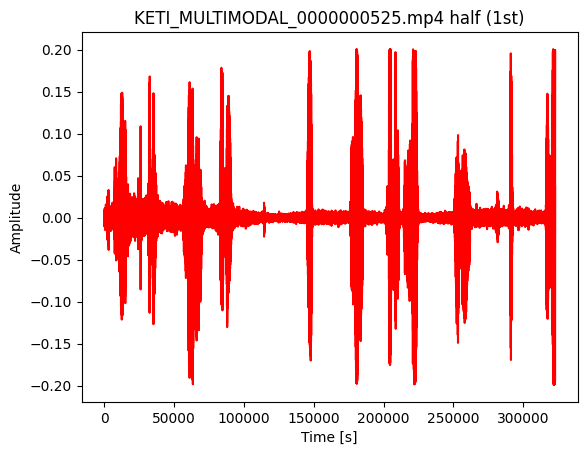

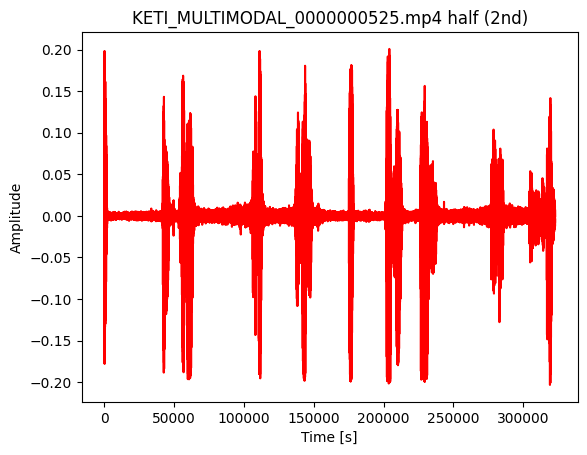

split to KETI_MULTIMODAL_00000005251	 KETI_MULTIMODAL_00000005252


In [26]:
wav_files = [] 

for mp4_file in mp4_files:
  get_mp4(mp4_file)
  wav_files.append(save_half_as_wav(mp4_file)) # 원본 음성 반으로 자르고 / 잘린 음성 새로 저장한 파일명 저장

# Mel-Spectrogram

In [27]:
frame_length = 0.025
frame_stride = 0.010

def Mel_S(wav_file):
    # mel-spectrogram
    (file_dir, file_id) = os.path.split(wav_file)
    y, sr = librosa.load(wav_file, sr = 16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram of {file_id}')
    plt.tight_layout()
    path = '/content/drive/MyDrive/CAPSTONE/data/cut/mel_image/'
    plt.savefig(path + file_id[:-4] + "_Mel-Spectrogram.png")
    plt.show()

    return S

Wav length: 21.344, Mel_S shape:(40, 2135)


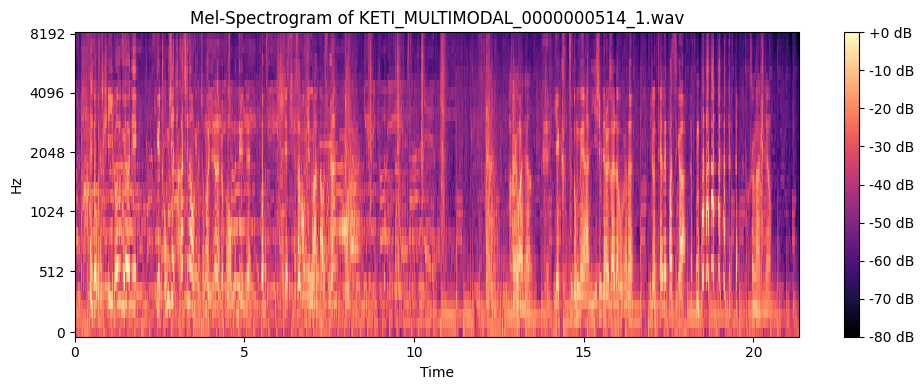

Wav length: 21.344, Mel_S shape:(40, 2135)


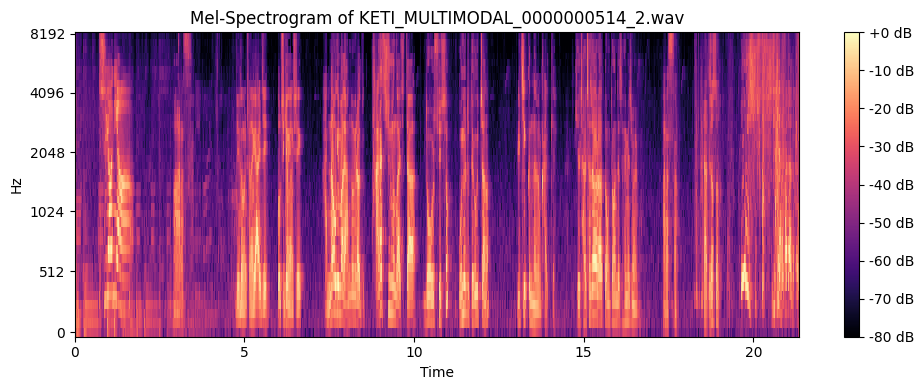

Wav length: 5.173375, Mel_S shape:(40, 518)


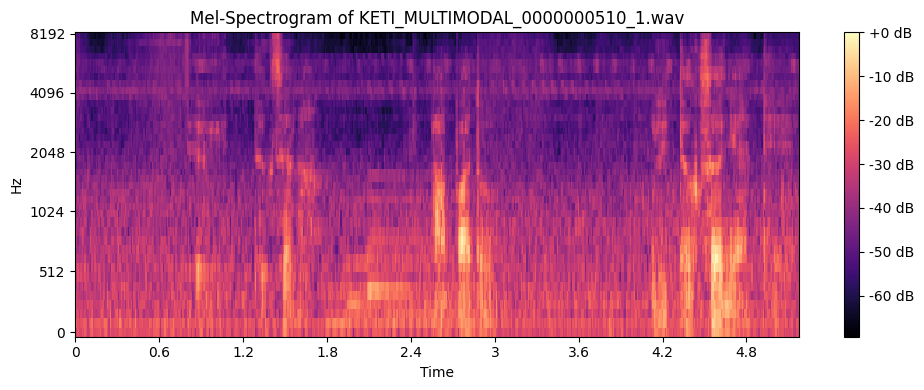

Wav length: 5.1733125, Mel_S shape:(40, 518)


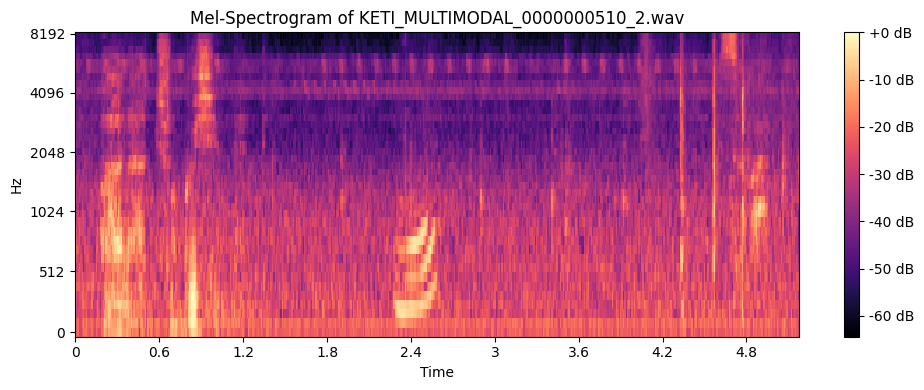

Wav length: 1.2586875, Mel_S shape:(40, 126)


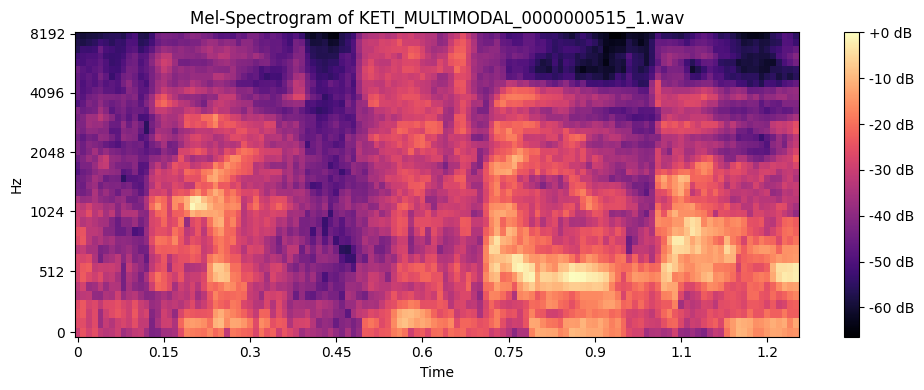

Wav length: 1.2586875, Mel_S shape:(40, 126)


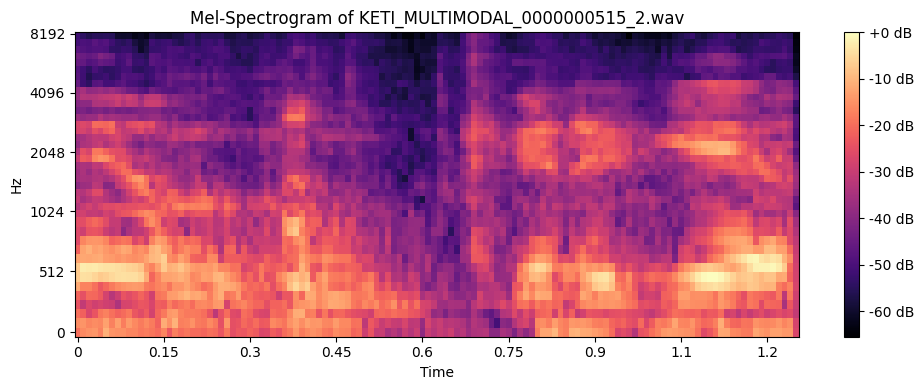

Wav length: 5.589375, Mel_S shape:(40, 559)


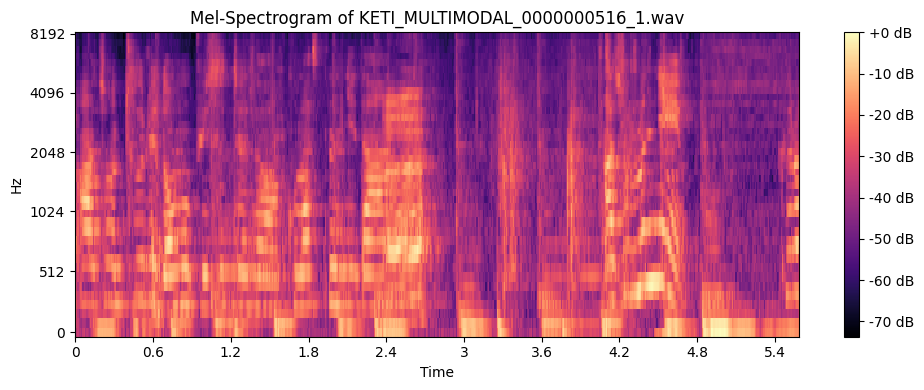

Wav length: 5.5893125, Mel_S shape:(40, 559)


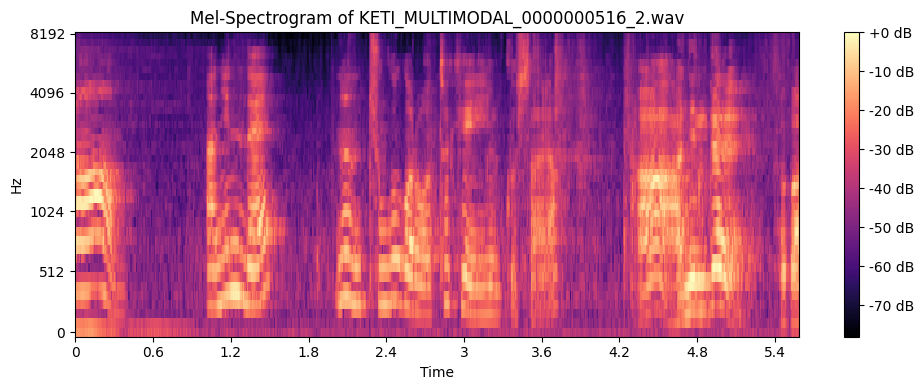

Wav length: 5.813375, Mel_S shape:(40, 582)


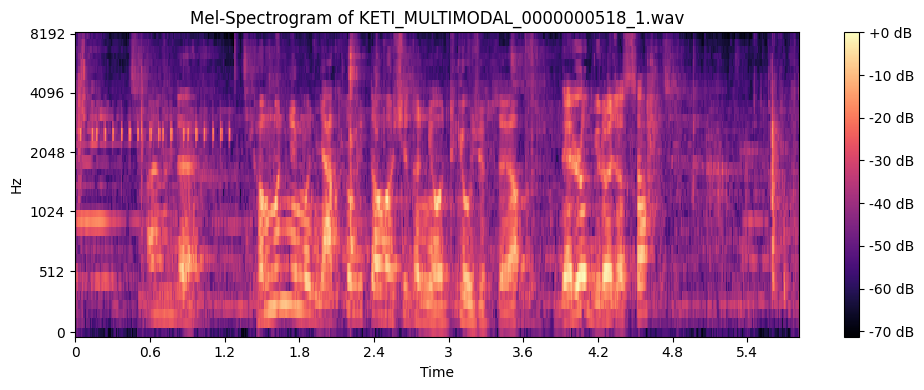

Wav length: 5.8133125, Mel_S shape:(40, 582)


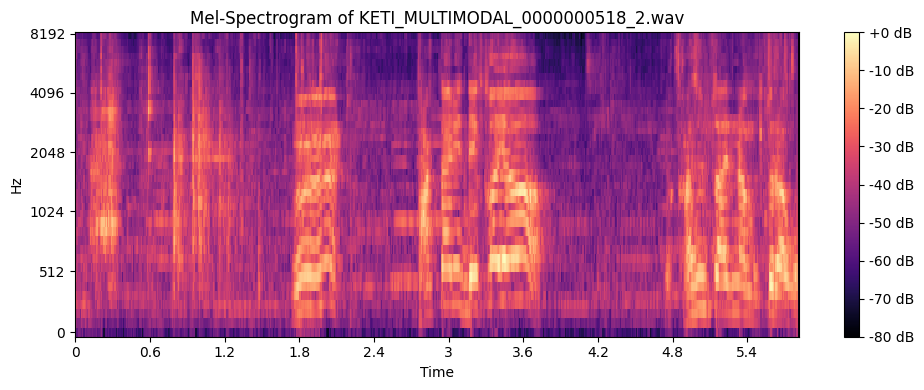

Wav length: 3.029375, Mel_S shape:(40, 303)


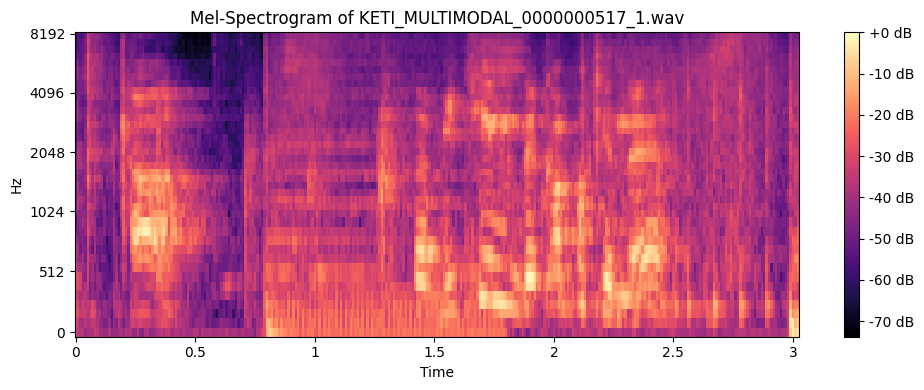

Wav length: 3.0293125, Mel_S shape:(40, 303)


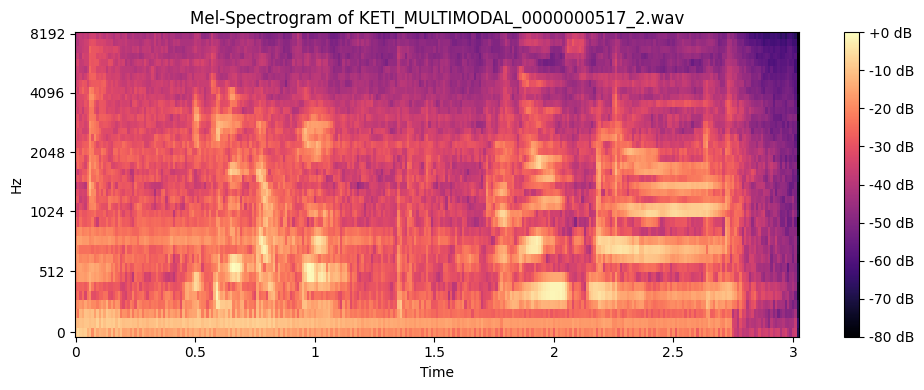

Wav length: 20.7786875, Mel_S shape:(40, 2078)


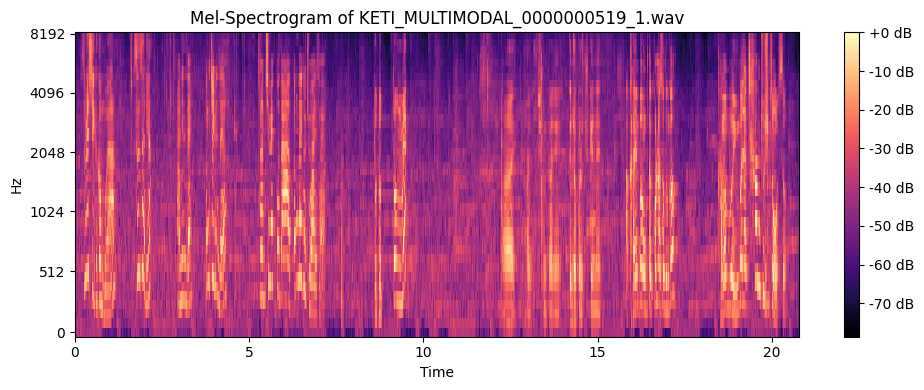

Wav length: 20.7786875, Mel_S shape:(40, 2078)


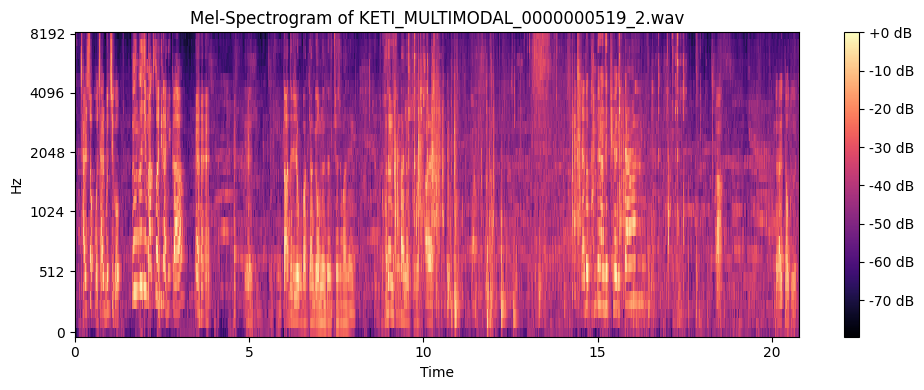

Wav length: 9.269375, Mel_S shape:(40, 927)


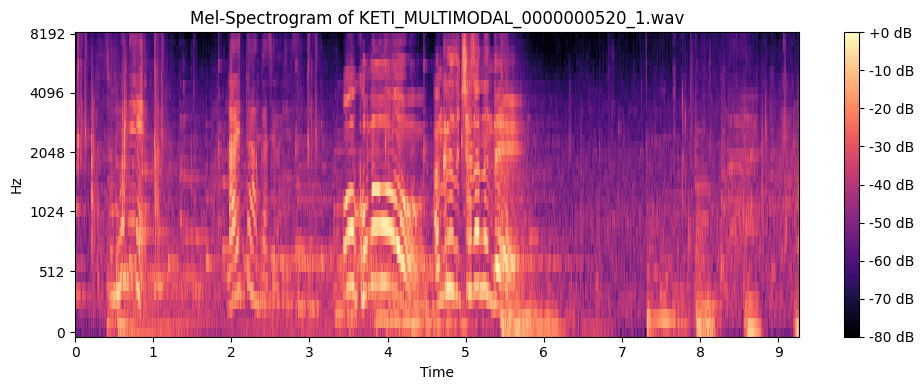

Wav length: 9.2693125, Mel_S shape:(40, 927)


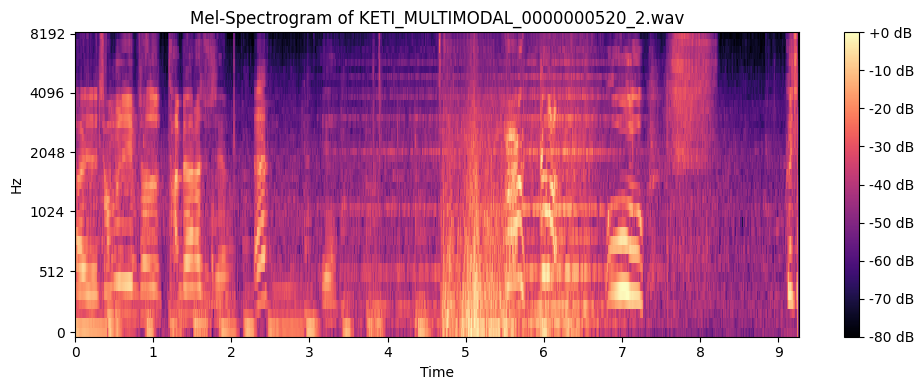

Wav length: 36.992, Mel_S shape:(40, 3700)


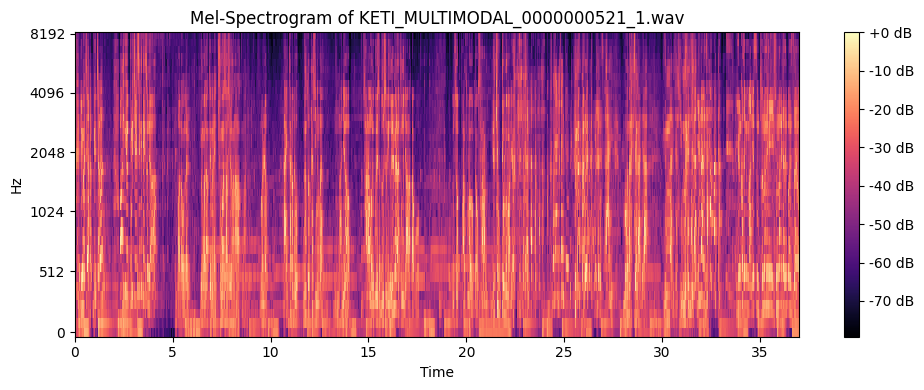

Wav length: 36.992, Mel_S shape:(40, 3700)


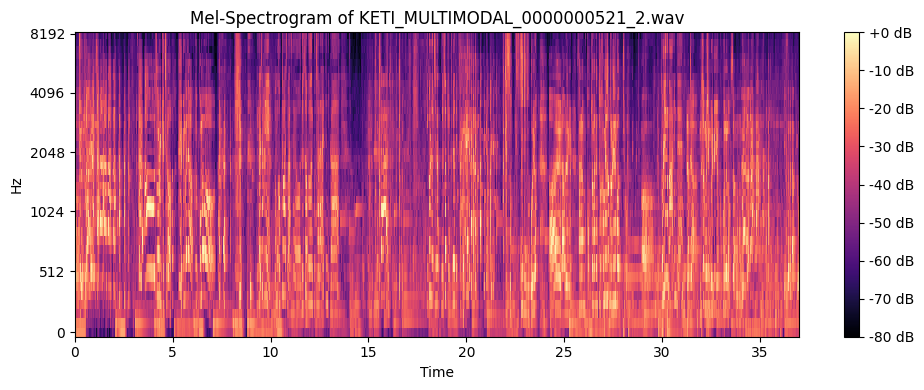

Wav length: 20.0746875, Mel_S shape:(40, 2008)


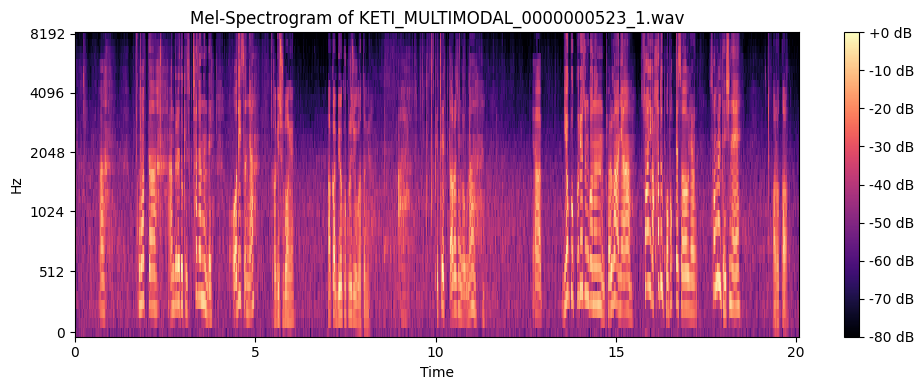

Wav length: 20.0746875, Mel_S shape:(40, 2008)


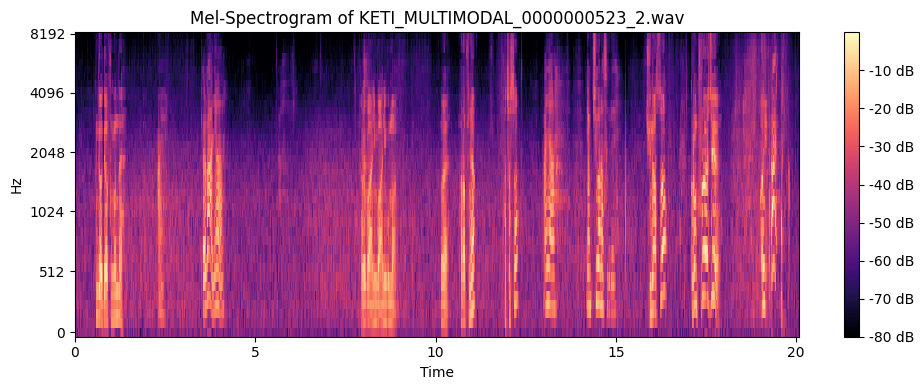

Wav length: 21.589375, Mel_S shape:(40, 2159)


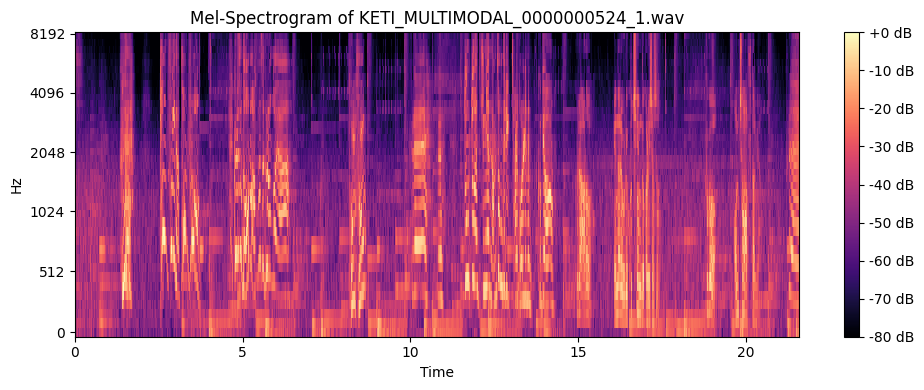

Wav length: 21.5893125, Mel_S shape:(40, 2159)


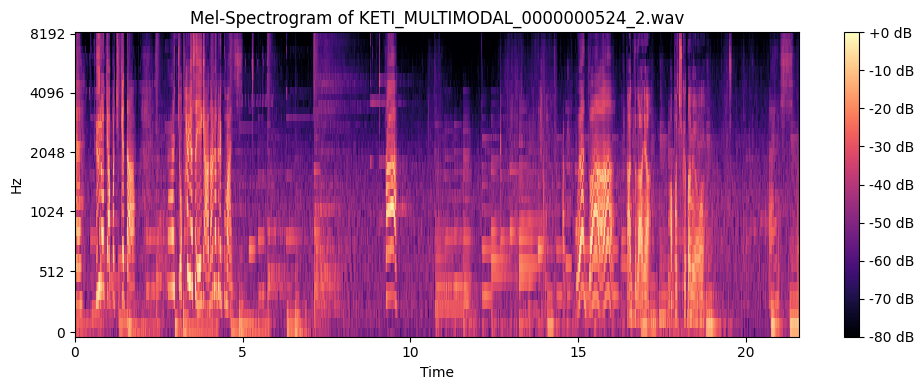

Wav length: 20.1706875, Mel_S shape:(40, 2018)


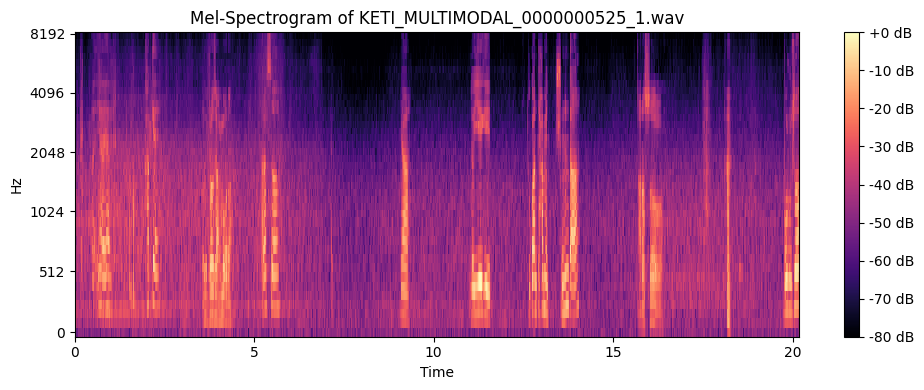

Wav length: 20.1706875, Mel_S shape:(40, 2018)


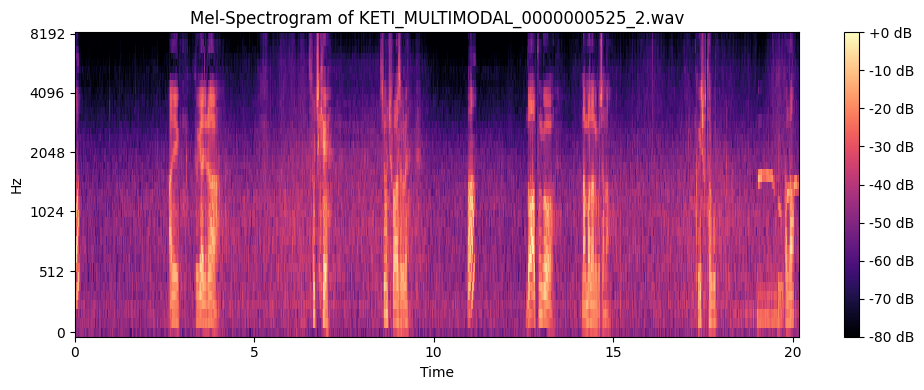

In [28]:
files = [] # 반으로 잘린 음성 파일명 전체
for i in range(len(wav_files)):
  file1, file2 = wav_files[i]
  files.extend([file1, file2])

for wav_file in files:
  mel_spec = Mel_S(wav_file)
# mel-spec 결과 : cut/mel-image 폴더에 저장